### Questions to Solve

+ Course Title
	- What is the most frequent words in course title
	- Longest/Shortest course title
	- How can we build recommendation systems via title using similarity
	- Most famous courses by number of subscribers

+ Subjects/Category
	- What is the distribution of subjects
	- How many courses per subject
	- Distribution of subjects per year
	- How many people purchase a particular subject
	- Which subject is the most popular

+ Published Year
	- Number of courses per year
	- Which year has the highest number of courses
	- What is the trend of courses per year

+ Levels
	- How many levels do we have
	- What is the distribution of courses per levels
	- Which subject have the highest levels
	- How many subscribers per levels
	- How many courses per levels

+ Duration of Course
	- Which courses have the highest duration (paid or not)
	- Which courses have higher duration
	- Duration vs number of subscribers

+ Subscribers
	- Which course have the highest number of subscribers
	- Average number of subscribers
	- Number of subscribers per Subject
	- Number of subscribers per year

+ Price
	- What is the average price of a course
	- What is the min/max price
	- How much does Udemy earn
	- The most profitable courses

+ Correlation Questions
	- Does number of subscribers depend on
	- number of reviews
	- price
	- number of lectures
	- content duration

In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
df = pd.read_csv('udemy_course_data.csv')
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,published_time,year,month,day
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance,429400,2017-01-18,20:58:58Z,2017,1,18
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance,209400,2017-03-09,16:34:20Z,2017,3,9
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance,97830,2016-12-19,19:26:30Z,2016,12,19
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance,232845,2017-05-30,20:07:24Z,2017,5,30
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance,255200,2016-12-13,14:57:18Z,2016,12,13


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   course_id            3683 non-null   int64 
 1   course_title         3683 non-null   object
 2   url                  3683 non-null   object
 3   is_paid              3683 non-null   bool  
 4   price                3683 non-null   int64 
 5   num_subscribers      3683 non-null   int64 
 6   num_reviews          3683 non-null   int64 
 7   num_lectures         3683 non-null   int64 
 8   level                3683 non-null   object
 9   content_duration     3683 non-null   object
 10  published_timestamp  3683 non-null   object
 11  subject              3683 non-null   object
 12  profit               3683 non-null   int64 
 13  published_date       3683 non-null   object
 14  published_time       3682 non-null   object
 15  year                 3683 non-null   int64 
 16  month 

### EDA on Subject/Category

+ Subjects/Category
	- What is the distribution of subjects
	- How many courses per subject
	- Distribution of subjects per year
	- How many people purchase a particular subject
	- Which subject is the most popular

In [54]:
len(df['course_title'].unique())

3668

C:\Users\ashish\AppData\Local\Temp\ipykernel_3932\1707755158.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sn.countplot(df['subject'],palette='plasma')


<Axes: xlabel='count', ylabel='subject'>

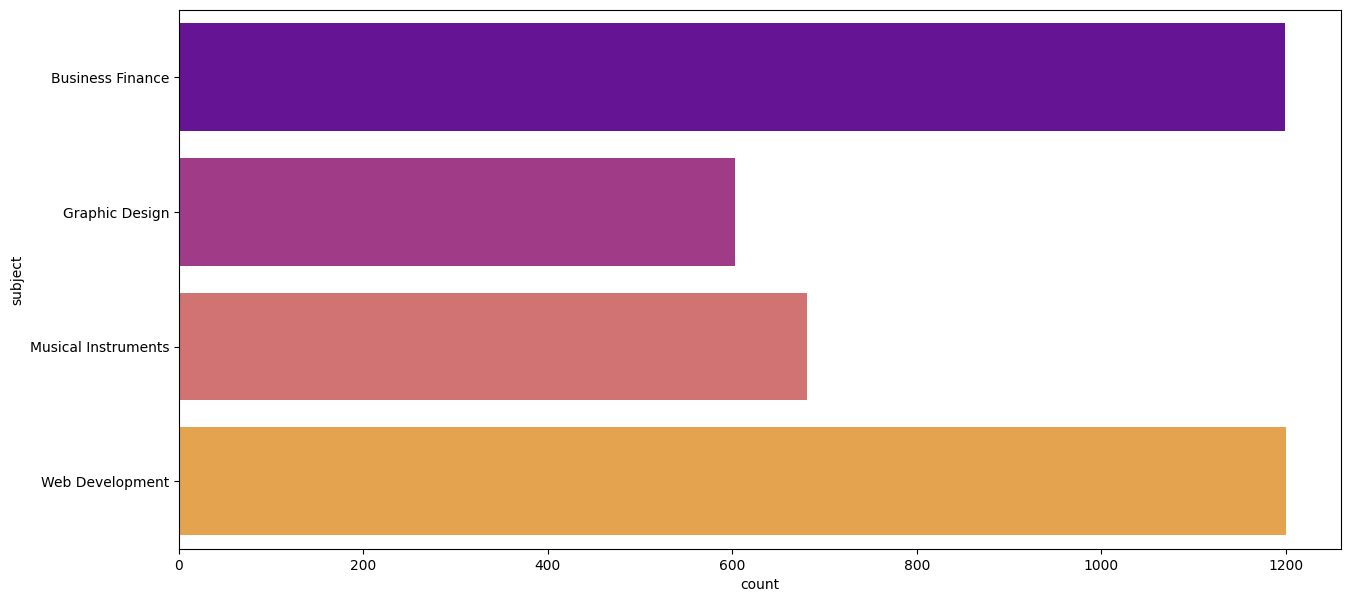

In [55]:
plt.figure(figsize=(15,7))
sn.countplot(df['subject'],palette='plasma')

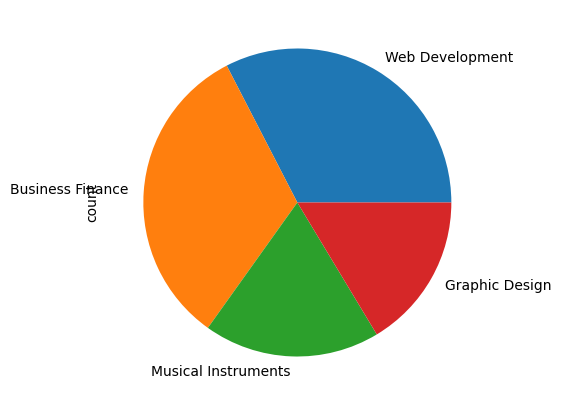

In [56]:
plt.figure(figsize=(10,5))
df['subject'].value_counts().plot(kind='pie')
plt.show()

### EDA on Subscribers
+ Subscribers
	- Which course have the highest number of subscribers
	- Average number of subscribers
	- Number of subscribers per Subject
	- Number of subscribers per year

<Axes: ylabel='subject'>

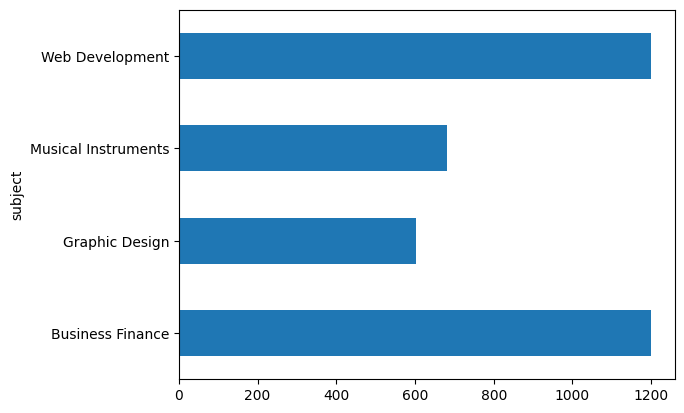

In [57]:
df.groupby('subject')['num_subscribers'].count().plot(kind = 'barh')

<Axes: ylabel='subject'>

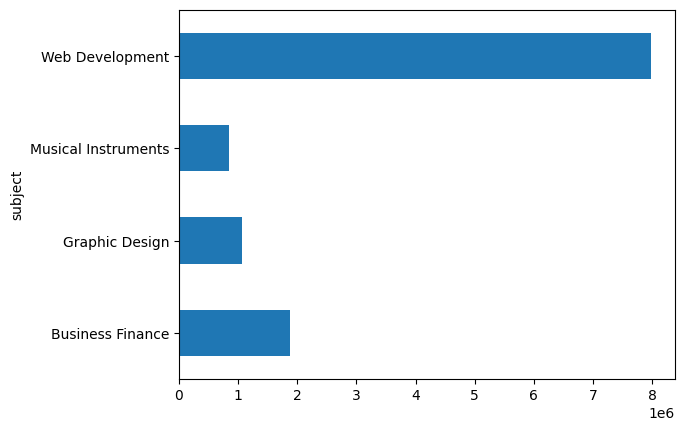

In [58]:
df.groupby('subject')['num_subscribers'].sum().plot(kind = 'barh')

<Axes: ylabel='num_subscribers'>

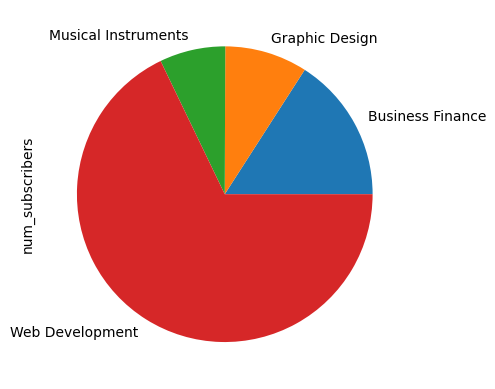

In [59]:
df.groupby('subject')['num_subscribers'].sum().plot(kind = 'pie')

### EDA on Levels

+ Levels
	- How many levels do we have
	- What is the distribution of courses per levels
	- Which subject have the highest levels
	- How many subscribers per levels
	- How many courses per levels


<Axes: ylabel='level'>

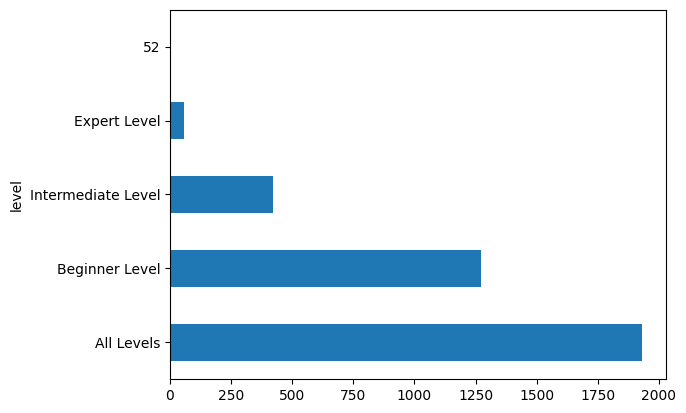

In [60]:
df['level'].value_counts().plot(kind = 'barh')

<Axes: ylabel='level'>

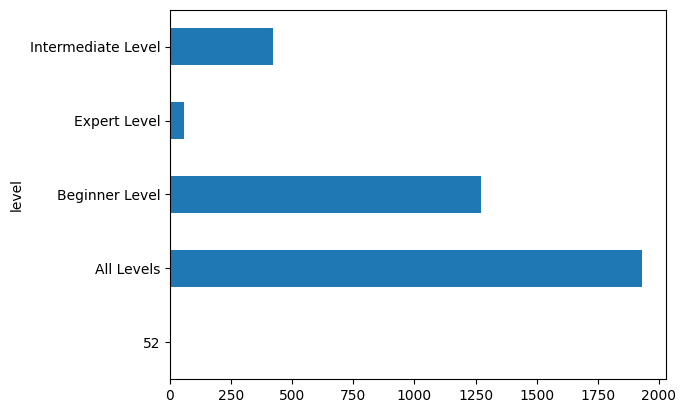

In [61]:
## grouping the level as per persons intrest

df.groupby(['level'])['num_subscribers'].count().plot(kind='barh')

<Axes: xlabel='level'>

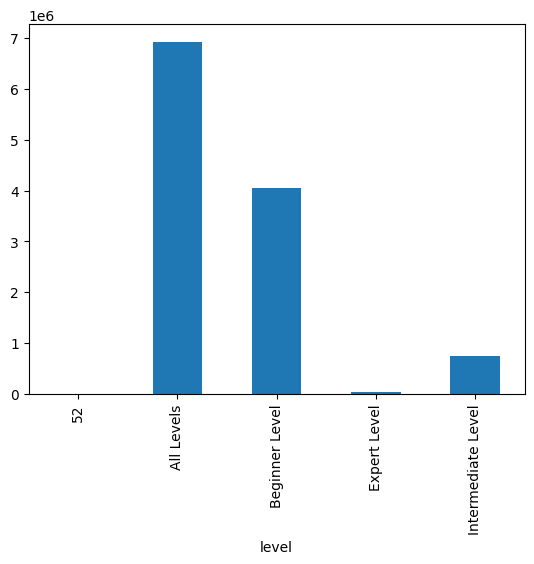

In [62]:
df.groupby(['level'])['num_subscribers'].sum().plot(kind = 'bar')

<Axes: xlabel='subject'>

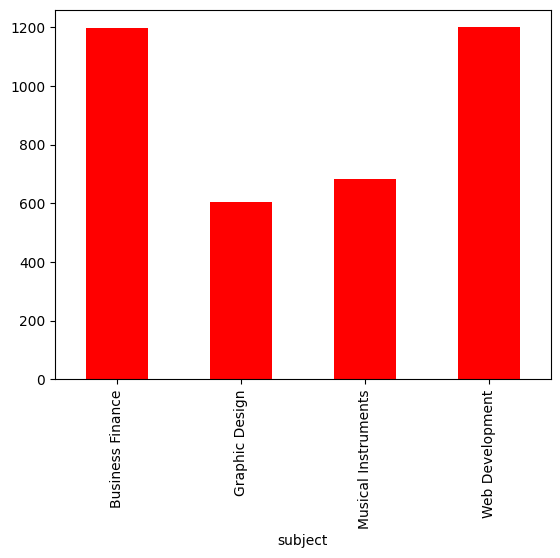

In [63]:
# How many levels per subject category

df.groupby(['subject'])['level'].count().plot(kind = 'bar',color = 'red')

Text(0, 0.5, 'Count of Levels')

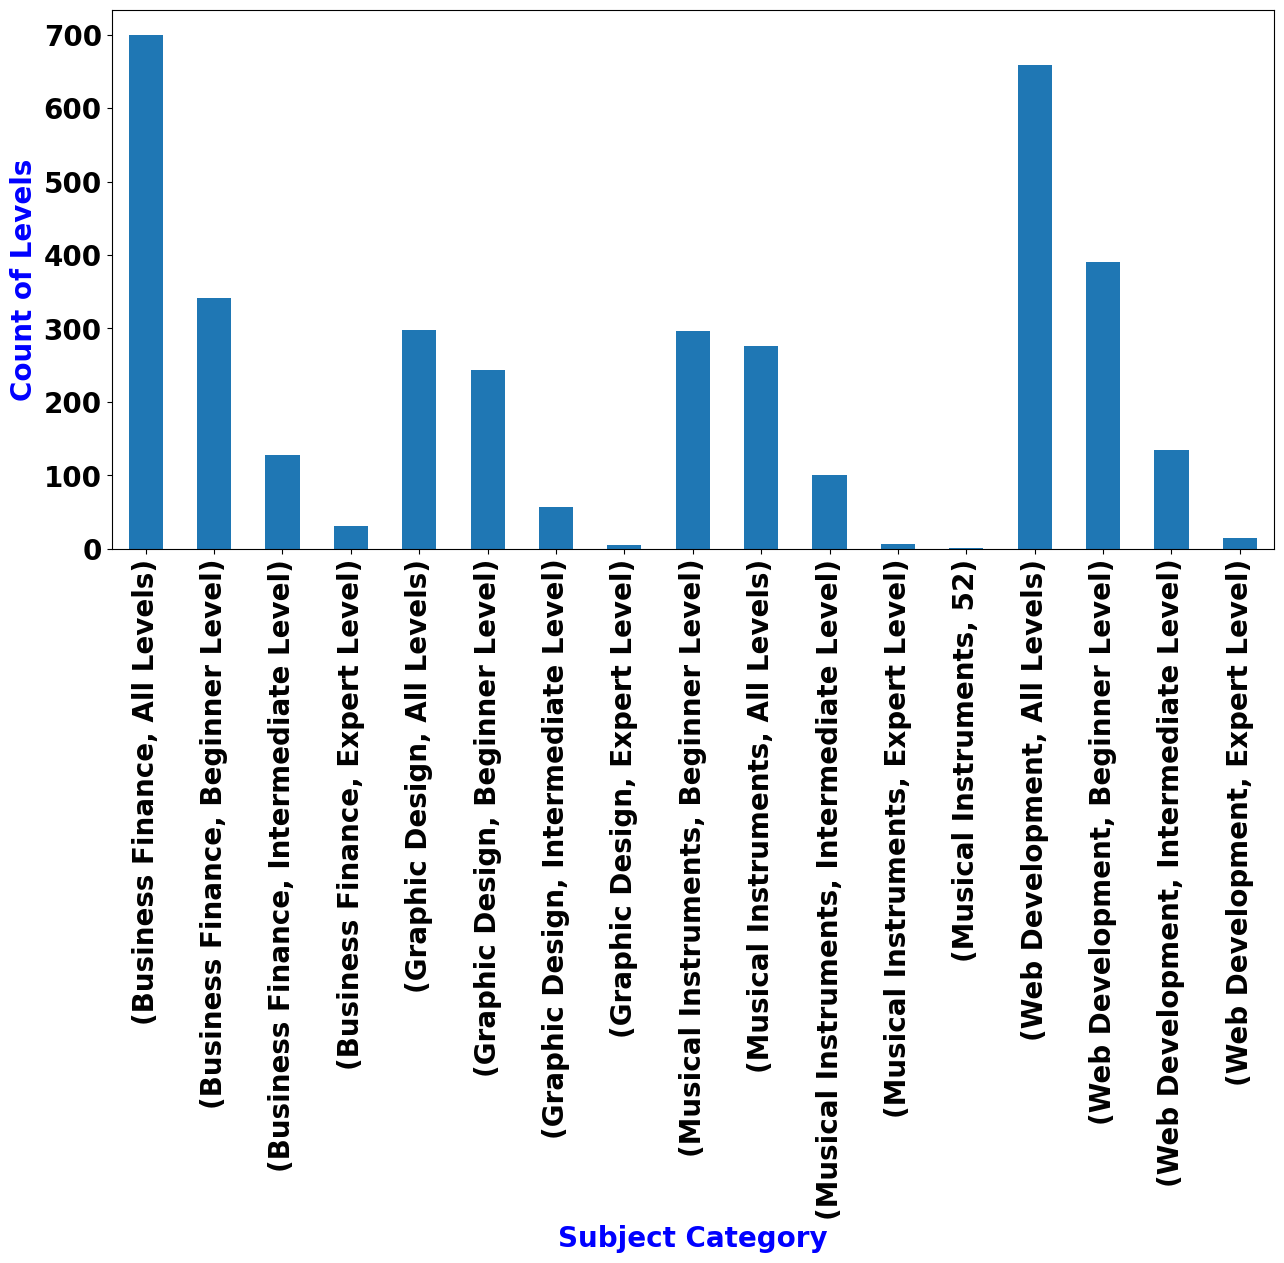

In [64]:
# Plot of How many levels per subject category

plt.figure(figsize=(15,7))
df.groupby(['subject'])['level'].value_counts().plot(kind = 'bar')

plt.xticks(fontsize = 20,fontweight = 'bold')
plt.yticks(fontsize = 20,fontweight = 'bold')
plt.xlabel('Subject Category',fontsize = 20,fontweight = 'bold',color = 'blue')
plt.ylabel('Count of Levels',fontsize = 20,fontweight = 'bold',color = 'blue')

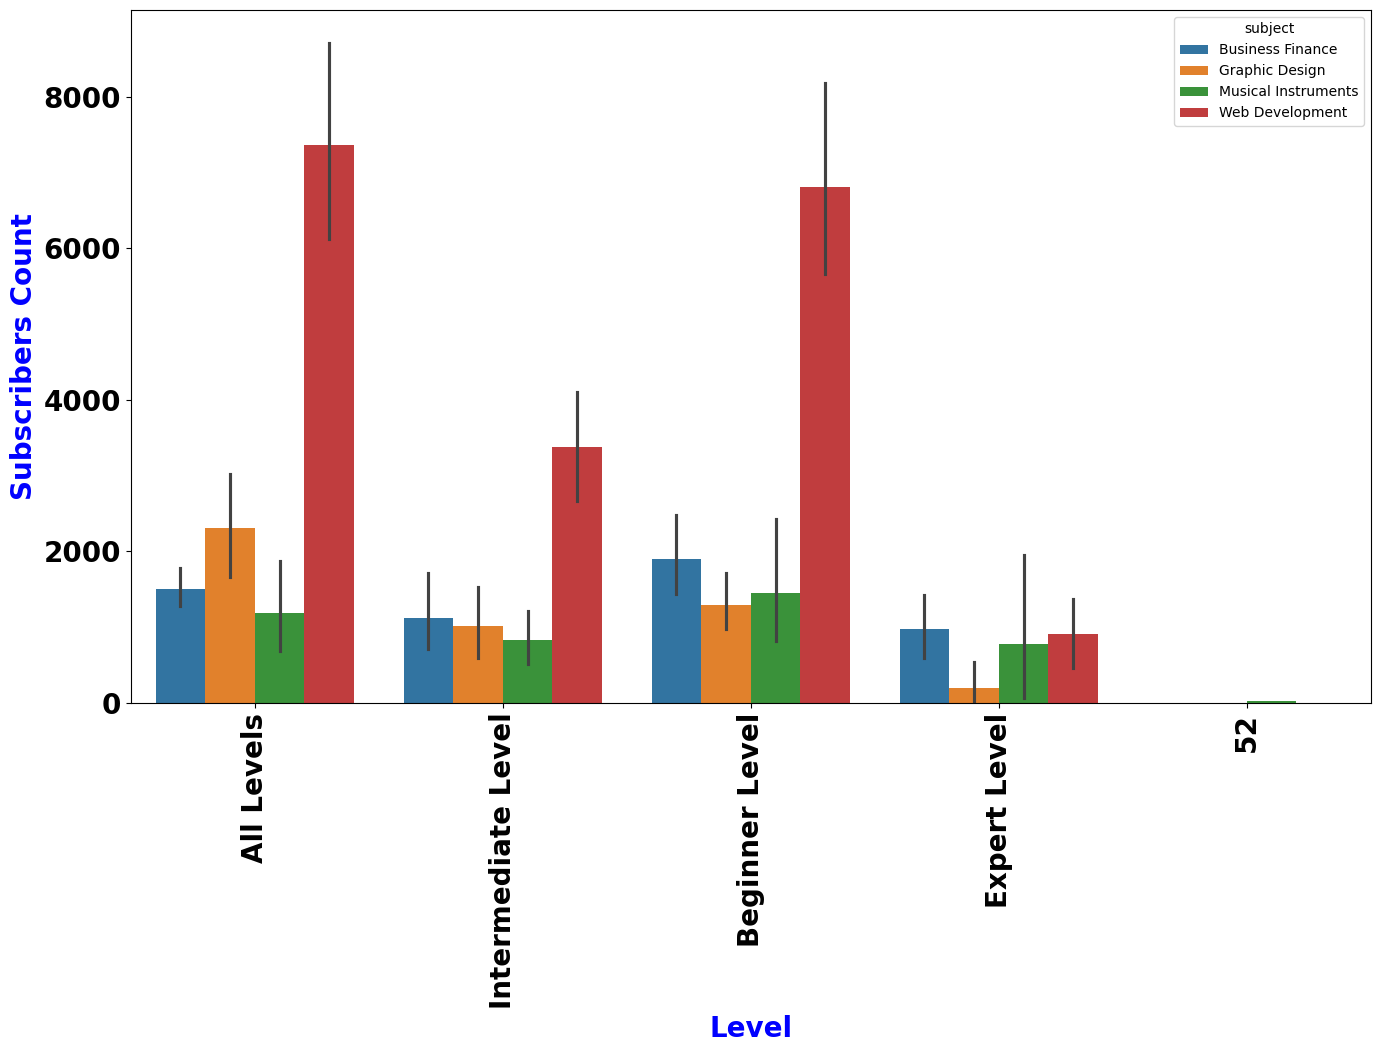

In [65]:
# number of levels and subscribers count

plt.figure(figsize=(16,9))
sn.barplot(x='level',y='num_subscribers', hue='subject',data=df)
plt.xticks(fontsize = 20,fontweight = 'bold')
plt.yticks(fontsize = 20,fontweight = 'bold')
plt.xlabel('Level',fontsize = 20,fontweight = 'bold',
           color = 'blue')
plt.ylabel('Subscribers Count',fontsize = 20,fontweight = 'bold',
           color = 'blue')
plt.xticks(rotation = 'vertical')
plt.show()

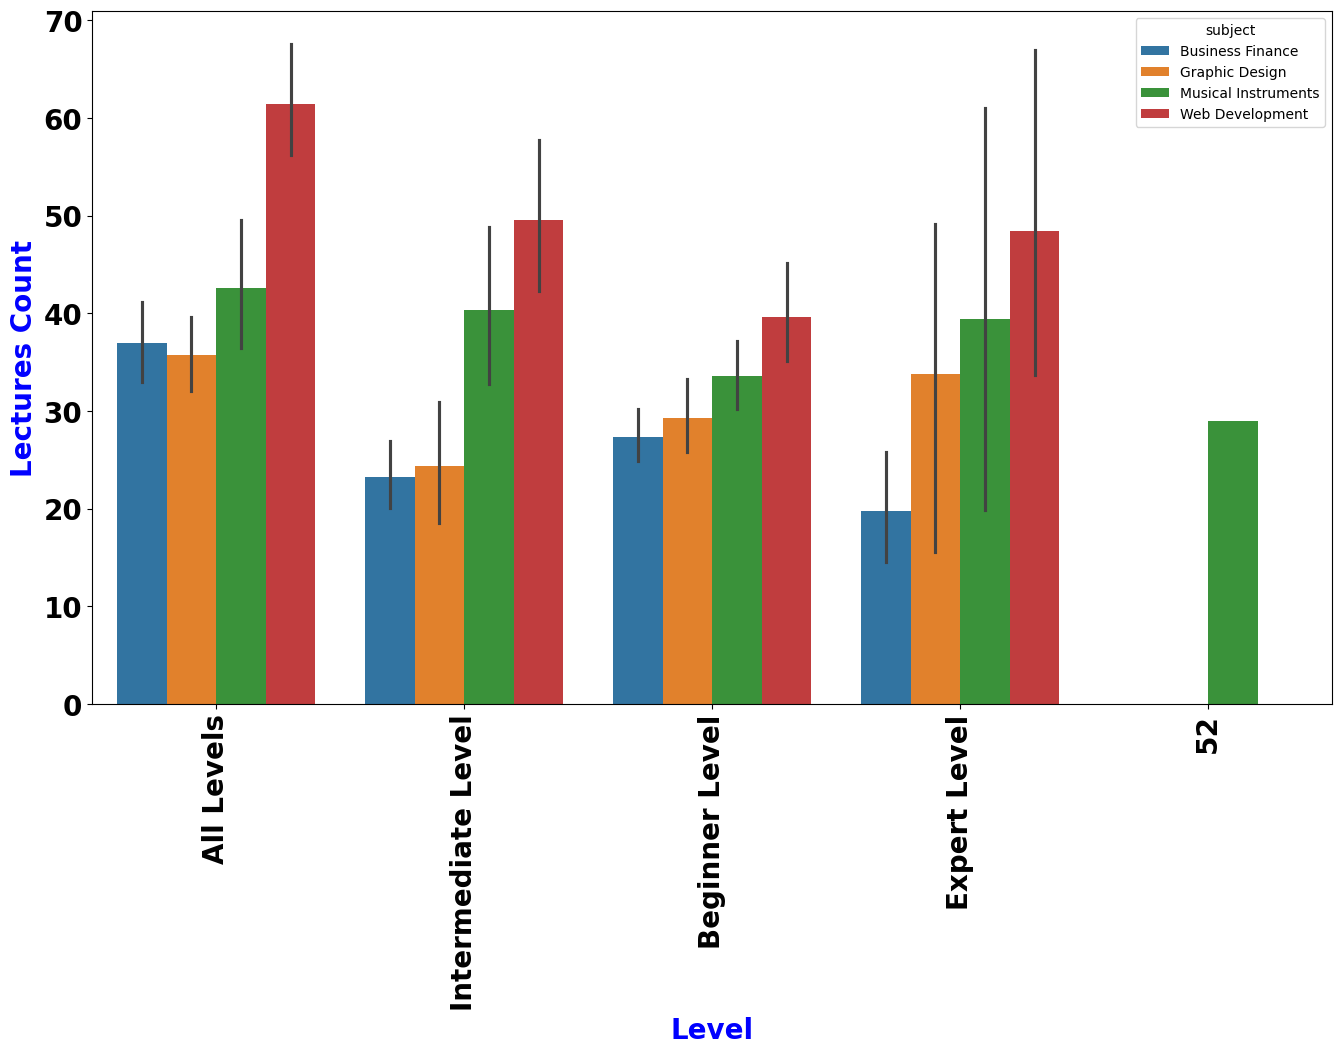

In [66]:
# number of levels and number of lectures count

plt.figure(figsize=(16,9))
sn.barplot(x='level',y='num_lectures', hue='subject',data=df)
plt.xticks(fontsize = 20,fontweight = 'bold')
plt.yticks(fontsize = 20,fontweight = 'bold')
plt.xlabel('Level',fontsize = 20,fontweight = 'bold',
           color = 'blue')
plt.ylabel('Lectures Count',fontsize = 20,fontweight = 'bold',
           color = 'blue')
plt.xticks(rotation = 'vertical')
plt.show()

In [67]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject', 'profit',
       'published_date', 'published_time', 'year', 'month', 'day'],
      dtype='object')

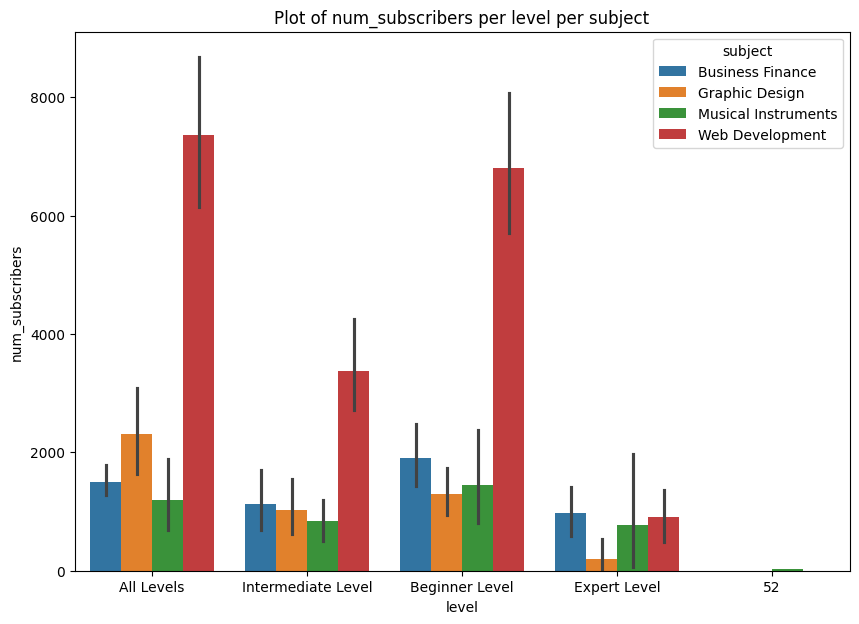

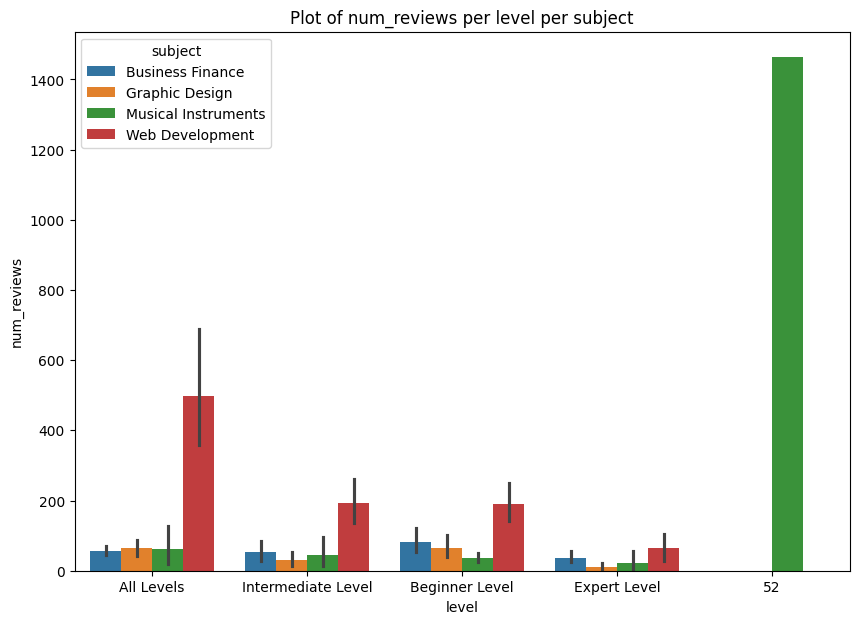

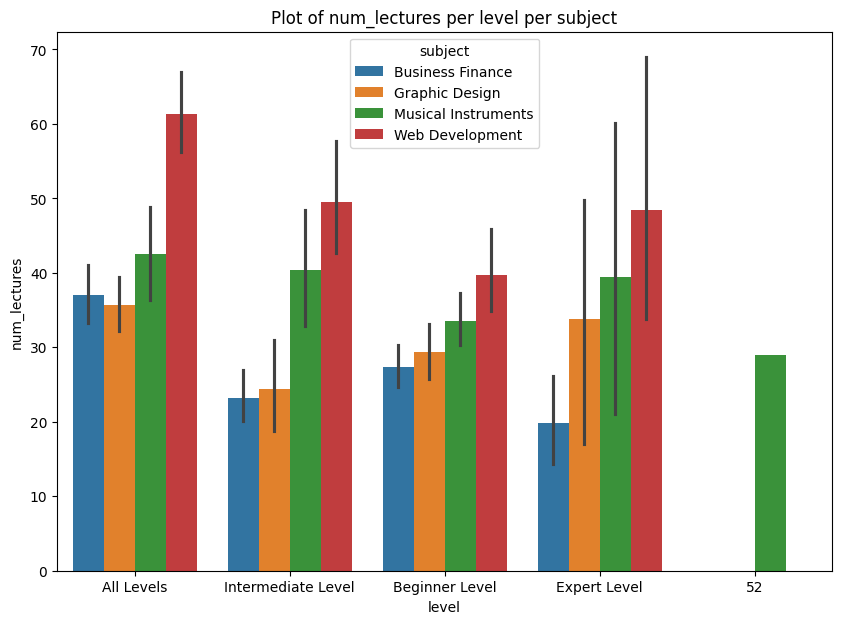

In [68]:
# reviews_level plot and lectures_level plot

def plotdata(df,feature):
    plt.figure(figsize=(10,7))
    plt.title("Plot of {} per level per subject".format(feature))
    sn.barplot(x = 'level',y = feature,data=df,hue = 'subject')
    plt.show()
    
    
featureslist = ['num_subscribers', 'num_reviews', 'num_lectures']
for feature in featureslist:
    plotdata(df,feature)

### EDA on Price
+ Price
	- What is the average price of a course
	- What is the min/max price
	- How much does Udemy earn
	- The most profitable courses

In [69]:
df['price'].unique()

array([200,  75,  45,  95, 150,  65, 195,  30,  20,  50, 175, 140, 115,
       190, 125,  60, 145, 105, 155, 185, 180, 120,  25, 160,  40,   0,
       100,  90,  35,  80,  70,  55, 165, 130,  85, 170, 110, 135])

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   course_id            3683 non-null   int64 
 1   course_title         3683 non-null   object
 2   url                  3683 non-null   object
 3   is_paid              3683 non-null   bool  
 4   price                3683 non-null   int64 
 5   num_subscribers      3683 non-null   int64 
 6   num_reviews          3683 non-null   int64 
 7   num_lectures         3683 non-null   int64 
 8   level                3683 non-null   object
 9   content_duration     3683 non-null   object
 10  published_timestamp  3683 non-null   object
 11  subject              3683 non-null   object
 12  profit               3683 non-null   int64 
 13  published_date       3683 non-null   object
 14  published_time       3682 non-null   object
 15  year                 3683 non-null   int64 
 16  month 

In [71]:
# replacing the Free/True courses with 0 
df['price'] = df['price'].astype(str)

df['price'] = df['price'].str.replace('TRUE|Free','0')

df['price'].unique()

array(['200', '75', '45', '95', '150', '65', '195', '30', '20', '50',
       '175', '140', '115', '190', '125', '60', '145', '105', '155',
       '185', '180', '120', '25', '160', '40', '0', '100', '90', '35',
       '80', '70', '55', '165', '130', '85', '170', '110', '135'],
      dtype=object)

In [72]:
df['price'] = df['price'].astype('float')

<Axes: xlabel='price'>

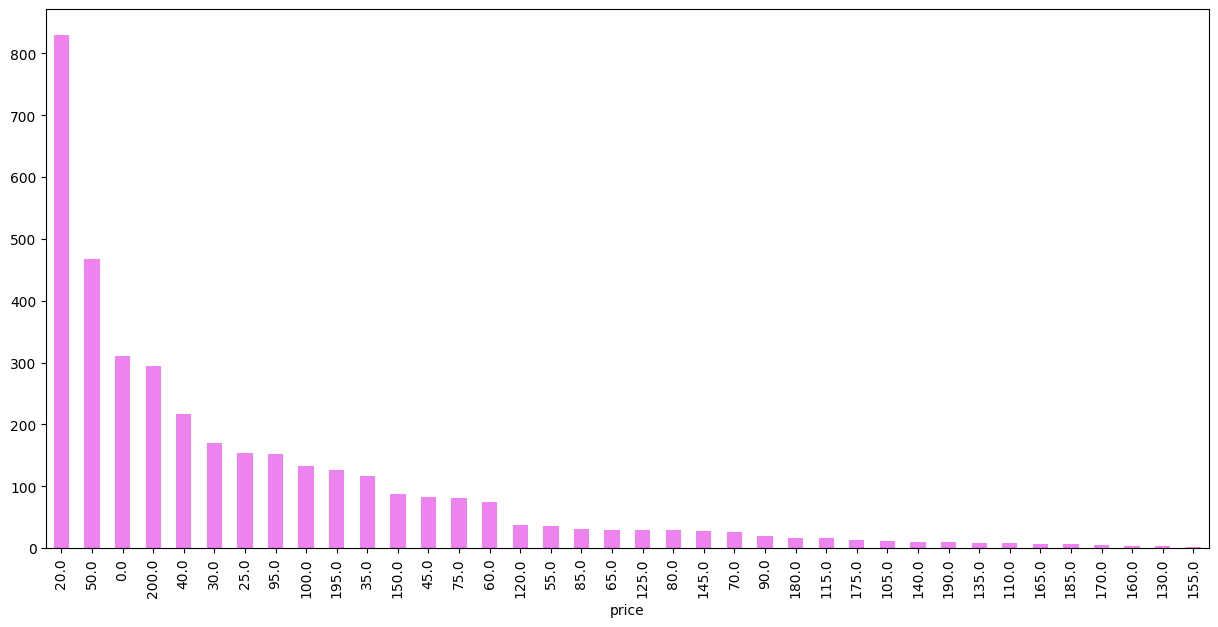

In [73]:
plt.figure(figsize=(15,7))
df['price'].value_counts().plot(kind = 'bar',color = 'violet')

In [74]:
# What is the most profitable course
# price x num_subscriber

df['profit'] = df['price'] * df['num_subscribers']
df.head(3)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,published_time,year,month,day
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200.0,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance,429400.0,2017-01-18,20:58:58Z,2017,1,18
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75.0,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance,209400.0,2017-03-09,16:34:20Z,2017,3,9
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45.0,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance,97830.0,2016-12-19,19:26:30Z,2016,12,19


In [75]:
# The most profitable course
    
df[df['profit']==df['profit'].max()].style.background_gradient(cmap = 'plasma')

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,published_time,year,month,day
3235,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,True,200.000000,121584,27445,342,All Levels,43 hours,2015-11-02T21:13:27Z,Web Development,24316800.000000,2015-11-02,21:13:27Z,2015,11,2


In [76]:
df.iloc[3235]

course_id                                                         625204
course_title                                  The Web Developer Bootcamp
url                    https://www.udemy.com/the-web-developer-bootcamp/
is_paid                                                             True
price                                                              200.0
num_subscribers                                                   121584
num_reviews                                                        27445
num_lectures                                                         342
level                                                         All Levels
content_duration                                                43 hours
published_timestamp                                 2015-11-02T21:13:27Z
subject                                                  Web Development
profit                                                        24316800.0
published_date                                     

In [77]:
# The least profitable course,these may be free course
    
df[df['profit']==df['profit'].min()].style.background_gradient(cmap = 'plasma')

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,published_time,year,month,day
97,1148774,Options Trading 101: The Basics,https://www.udemy.com/options-trading-101-the-basics/,False,0.000000,1514,66,11,Beginner Level,33 mins,2017-03-23T22:19:57Z,Business Finance,0.000000,2017-03-23,22:19:57Z,2017,3,23
105,133536,Stock Market Investing for Beginners,https://www.udemy.com/the-beginners-guide-to-the-stock-market/,False,0.000000,50855,2698,15,Beginner Level,1.5 hours,2013-12-25T19:53:34Z,Business Finance,0.000000,2013-12-25,19:53:34Z,2013,12,25
108,265960,Fundamentals of Forex Trading,https://www.udemy.com/fundamentals-of-forex-trading/,False,0.000000,17160,620,23,All Levels,1 hour,2014-08-29T20:10:38Z,Business Finance,0.000000,2014-08-29,20:10:38Z,2014,8,29
110,923616,Website Investing 101 - Buying & Selling Online Businesses,https://www.udemy.com/cash-flow-website-investing-buy-sell-online-businesses-digital-assets/,False,0.000000,6811,151,51,All Levels,2 hours,2016-08-05T17:03:15Z,Business Finance,0.000000,2016-08-05,17:03:15Z,2016,8,5
114,191854,Stock Market Foundations,https://www.udemy.com/how-to-invest-in-the-stock-market-beginners/,False,0.000000,19339,794,9,Beginner Level,2 hours,2014-03-31T21:35:06Z,Business Finance,0.000000,2014-03-31,21:35:06Z,2014,3,31
121,151668,Introduction to Financial Modeling,https://www.udemy.com/financial-modeling-asimplemodel/,False,0.000000,29167,1463,8,Intermediate Level,1.5 hours,2014-05-27T16:22:16Z,Business Finance,0.000000,2014-05-27,16:22:16Z,2014,5,27
130,777444,Corporate Finance - A Brief Introduction,https://www.udemy.com/finance-a-brief-introduction-and-basics-finance-101/,False,0.000000,11724,649,17,Beginner Level,1.5 hours,2016-03-04T05:58:09Z,Business Finance,0.000000,2016-03-04,05:58:09Z,2016,3,4
145,48841,Accounting in 60 Minutes - A Brief Introduction,https://www.udemy.com/accounting-in-60-minutes-a-brief-introduction/,False,0.000000,56659,4397,16,Beginner Level,1.5 hours,2013-04-07T21:39:25Z,Business Finance,0.000000,2013-04-07,21:39:25Z,2013,4,7
181,1188742,Introduction to Cryptocurrencies and Blockchain,https://www.udemy.com/introduction-to-cryptocurrencies/,False,0.000000,3775,138,11,Beginner Level,2 hours,2017-05-01T21:18:54Z,Business Finance,0.000000,2017-05-01,21:18:54Z,2017,5,1
195,919906,Trading Options For Consistent Returns: Options Basics,https://www.udemy.com/trading-options-for-income/,False,0.000000,4077,281,20,Beginner Level,1.5 hours,2016-08-18T21:57:04Z,Business Finance,0.000000,2016-08-18,21:57:04Z,2016,8,18


In [78]:
# Average profitable course

df[df['profit']>=df['profit'].mean()].style.background_gradient(cmap = 'plasma')

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,published_time,year,month,day
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-banking-course/,True,200.000000,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance,429400.000000,2017-01-18,20:58:58Z,2017,1,18
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-profits-trading-options/,True,200.000000,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance,255200.000000,2016-12-13,14:57:18Z,2016,12,13
5,192870,Trading Penny Stocks: A Guide for All Levels In 2017,https://www.udemy.com/trading-penny-stocks-a-guide-for-all-levels/,True,150.000000,9221,138,25,All Levels,3 hours,2014-05-02T15:13:30Z,Business Finance,1383150.000000,2014-05-02,15:13:30Z,2014,5,2
7,403100,"Trading Stock Chart Patterns For Immediate, Explosive Gains",https://www.udemy.com/trading-chart-patterns-for-immediate-explosive-gains/,True,95.000000,2917,148,23,All Levels,2.5 hours,2015-01-30T22:13:03Z,Business Finance,277115.000000,2015-01-30,22:13:03Z,2015,1,30
8,476268,Options Trading 3 : Advanced Stock Profit and Success Method,https://www.udemy.com/day-trading-stock-options-3/,True,195.000000,5172,34,38,Expert Level,2.5 hours,2015-05-28T00:14:03Z,Business Finance,1008540.000000,2015-05-28,00:14:03Z,2015,5,28
10,592338,Forex Trading Secrets of the Pros With Amazon's AWS,https://www.udemy.com/trading-with-amazons-aws-servers-trade-secrets-of-the-pros/,True,200.000000,4284,93,76,All Levels,5 hours,2015-09-11T16:47:02Z,Business Finance,856800.000000,2015-09-11,16:47:02Z,2015,9,11
11,975046,Trading Options With Money Flow,https://www.udemy.com/trading-options-using-money-flow/,True,200.000000,1380,42,17,All Levels,1 hour,2016-10-18T22:52:31Z,Business Finance,276000.000000,2016-10-18,22:52:31Z,2016,10,18
13,794151,Forex Trading Course: Work Smarter Not Harder Proven Results,https://www.udemy.com/the-complete-trading-course/,True,195.000000,4061,52,16,All Levels,2 hours,2016-03-16T15:40:19Z,Business Finance,791895.000000,2016-03-16,15:40:19Z,2016,3,16
17,564966,The Complete Chart Pattern Trading Course: A Proven Approach,https://www.udemy.com/make-money-trading-stocks-from-home/,True,200.000000,2666,115,52,All Levels,4 hours,2015-08-10T21:07:35Z,Business Finance,533200.000000,2015-08-10,21:07:35Z,2015,8,10
18,606928,7 Deadly Mistakes of Investing that Will Slash Your Profits!,https://www.udemy.com/7-deadly-mistakes-of-investing/,True,50.000000,5354,24,23,All Levels,1.5 hours,2015-09-21T18:10:34Z,Business Finance,267700.000000,2015-09-21,18:10:34Z,2015,9,21


In [79]:
### How Many Courses on Udemy Are paid or free

df['is_paid'].unique()

array([ True, False])

In [80]:
paid_dict = {'True':True,'False':False,'FALSE':False,
             'TRUE':True,'https://www.udemy.com/learnguitartoworship/':True}

df['is_paid'] = df['is_paid'].map(paid_dict)

df['is_paid'].unique()
print(df['is_paid'].value_counts())


Series([], Name: count, dtype: int64)


C:\Users\ashish\AppData\Local\Temp\ipykernel_3932\946841403.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sn.countplot(x='is_paid', hue='is_paid', data=df, palette='plasma', legend=False)


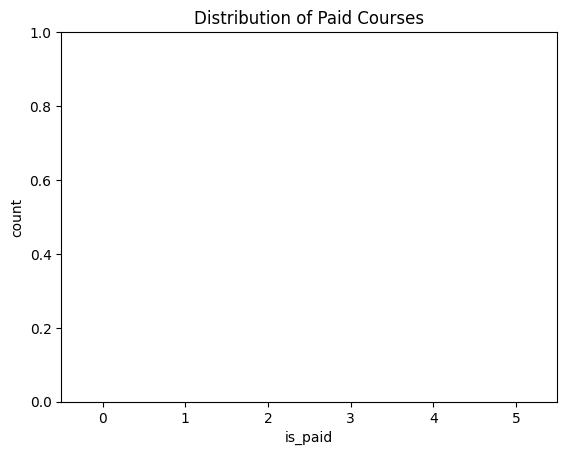

In [81]:
sn.countplot(x='is_paid', hue='is_paid', data=df, palette='plasma', legend=False)
plt.title('Distribution of Paid Courses')
plt.show()

In [82]:
df.groupby(['is_paid'])['subject'].value_counts()

Series([], Name: count, dtype: int64)

IndexError: index 0 is out of bounds for axis 0 with size 0

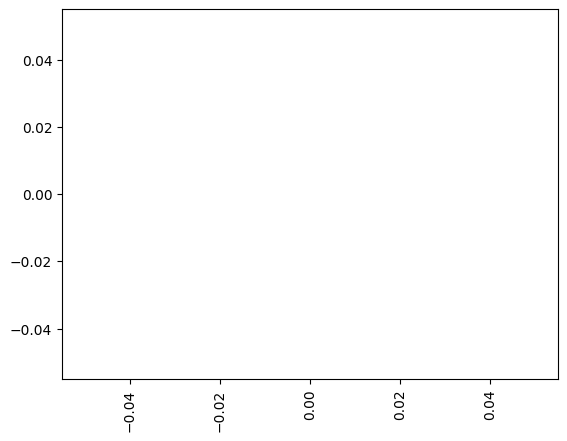

In [83]:
# paid courses with subjects

df[df['is_paid']==True].groupby(['is_paid'])['subject'].value_counts().plot(kind = 'bar',color = 'magenta')

In [84]:
# Check unique values in the 'is_paid' column
print(df['is_paid'].unique())

# Make sure you are filtering correctly, considering both True/False or 1/0
df_paid = df[df['is_paid'] == True]  # Use appropriate comparison based on the actual data

# If the filter still results in an empty dataframe, use df.isna() to check for NaN values
if df_paid.empty:
    print("No rows with 'is_paid' = True. Check the column data and adjust the filter.")

# If the dataframe is not empty, proceed to plotting
if not df_paid.empty:
    df_paid.groupby(['is_paid'])['subject'].value_counts().plot(kind='bar', color='magenta')


[nan]
No rows with 'is_paid' = True. Check the column data and adjust the filter.


IndexError: index 0 is out of bounds for axis 0 with size 0

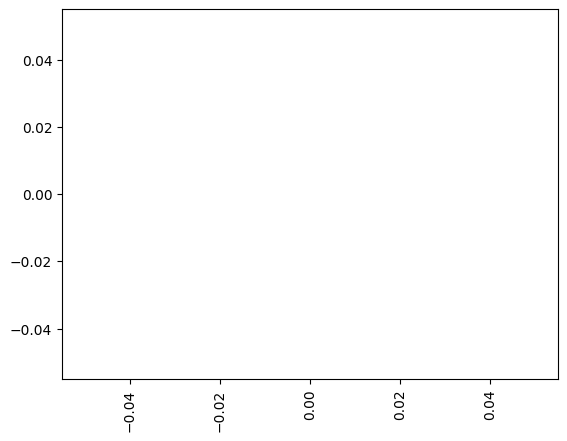

In [85]:
# free courses with subjects

df[df['is_paid']==False].groupby(['is_paid'])['subject'].value_counts().plot(kind = 'bar',color = 'magenta')

### Correlation Question
+ Correlation Questions
	- Does number of subscribers depend on
	- number of reviews
	- price
	- number of lectures
	- content duration

In [86]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject', 'profit',
       'published_date', 'published_time', 'year', 'month', 'day'],
      dtype='object')

<Axes: xlabel='price', ylabel='num_subscribers'>

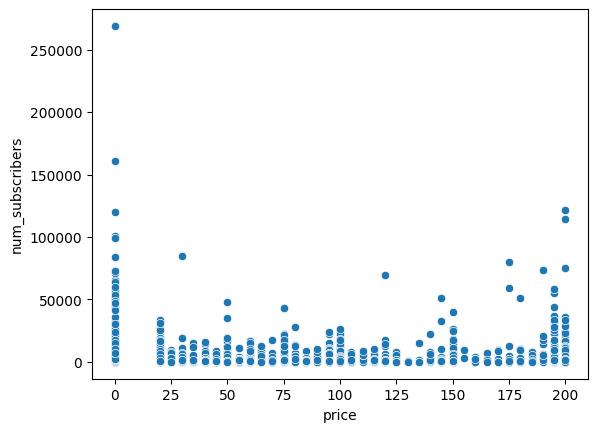

In [87]:
sn.scatterplot(data=df,x='price',y='num_subscribers')

<Axes: xlabel='price', ylabel='num_reviews'>

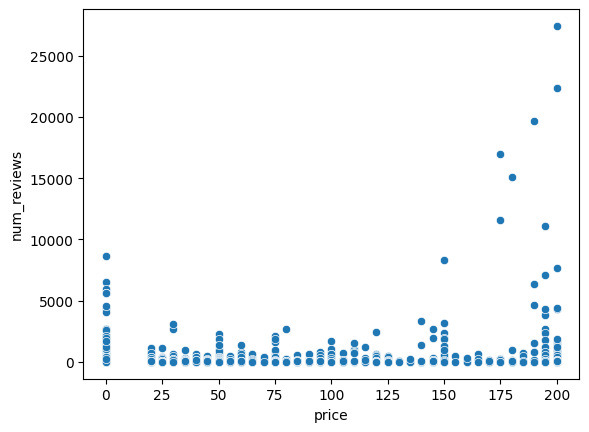

In [88]:
sn.scatterplot(data=df,x = 'price',y = 'num_reviews')

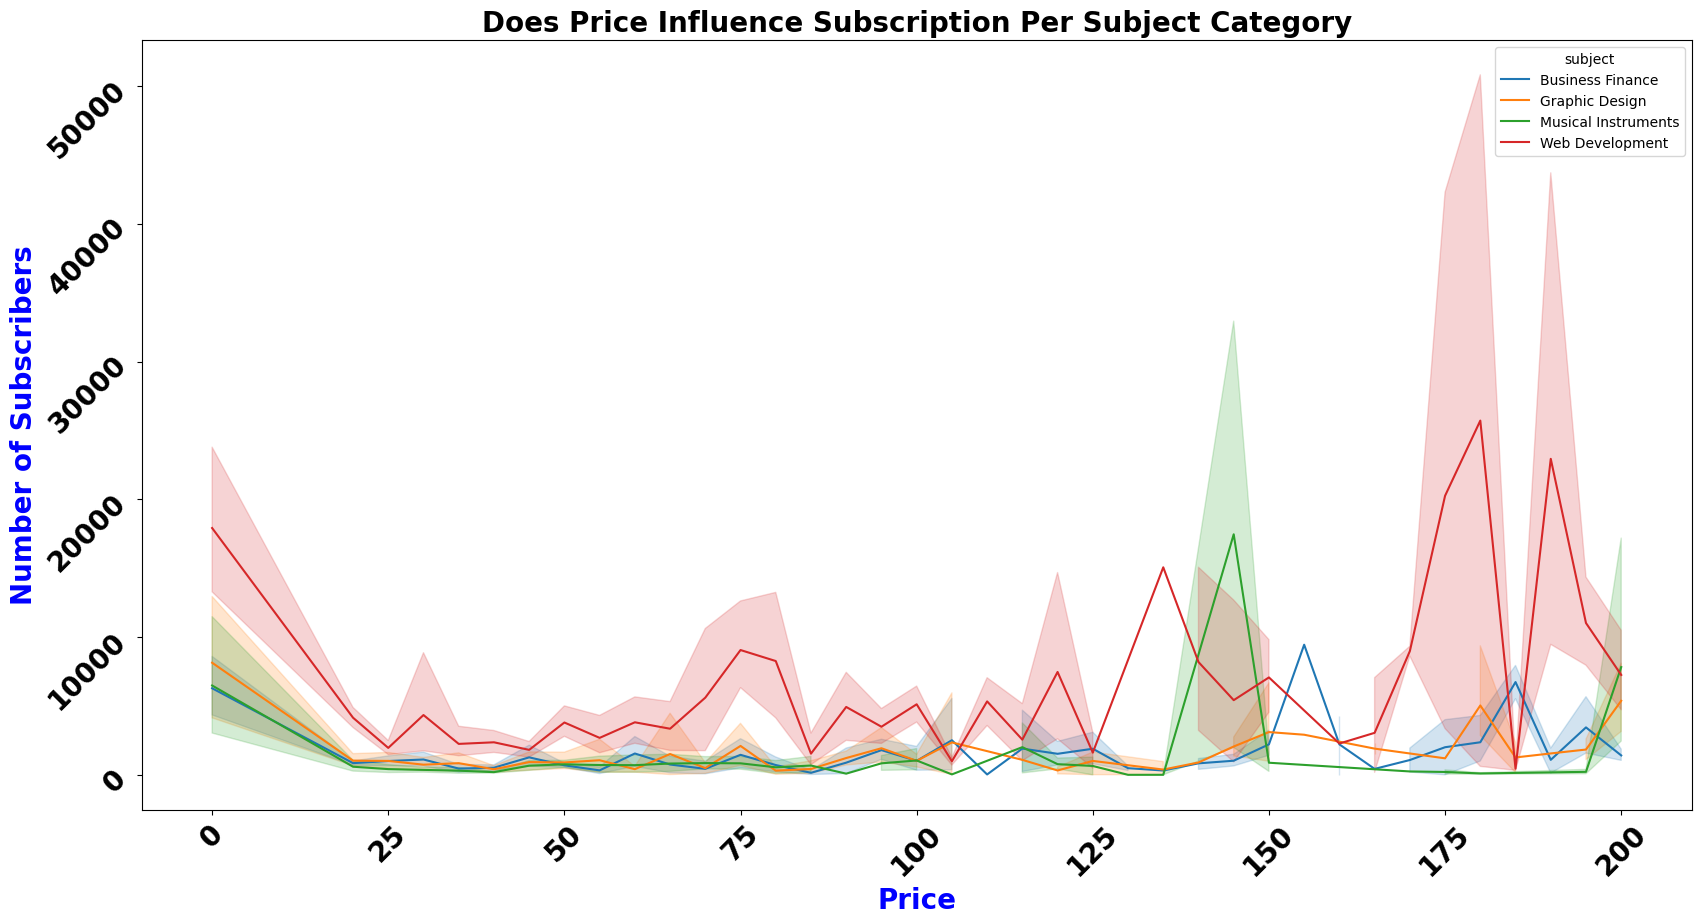

In [89]:
plt.figure(figsize=(20,10))
plt.title("Does Price Influence Subscription Per Subject Category",
         fontsize = 20,fontweight = 'bold')

sn.lineplot(data=df,x='price',y='num_subscribers',hue='subject')

plt.xticks(fontsize = 20,fontweight = 'bold',rotation = 45)
plt.yticks(fontsize = 20,fontweight = 'bold',rotation = 45)
plt.xlabel('Price',fontsize = 20,fontweight = 'bold',
           color = 'blue')
plt.ylabel('Number of Subscribers',fontsize = 20,fontweight = 'bold',
           color = 'blue')

plt.show()


<div class="text_cell_render border-box-sizing rendered_html">
<h3>Question on Time<a class="anchor-link" href="#Question-on-Time">¶</a>
</h3>
<ul>
<li>Published Year<ul>
<li>Number of courses per year</li>
<li>Distribution of subjects per year</li>
<li>Which year has the highest number of courses</li>
<li>What is the trend of courses per year</li>
</ul>
</li>
</ul>

</div>

In [90]:
df['published_timestamp'].head()

0    2017-01-18T20:58:58Z
1    2017-03-09T16:34:20Z
2    2016-12-19T19:26:30Z
3    2017-05-30T20:07:24Z
4    2016-12-13T14:57:18Z
Name: published_timestamp, dtype: object

In [91]:
# we need to extract year,month,date from the published timestamp

# so for that i will extract the year-month-date from the timestamp 

df['published_date'] = df['published_timestamp'].apply(lambda x:x.split('T')[0])

In [92]:
df.head(2)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,published_time,year,month,day
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,NaN,200.0,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance,429400.0,2017-01-18,20:58:58Z,2017,1,18
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,NaN,75.0,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance,209400.0,2017-03-09,16:34:20Z,2017,3,9


In [93]:
# converting the published date to pandas datetime object

df['published_date'] = pd.to_datetime(df['published_date'],format="%Y-%m-%d")

ValueError: time data "3 hours" doesn't match format "%Y-%m-%d", at position 2066. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [94]:
df[df['published_date']=='3 hours']

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,published_time,year,month,day
2066,96698,Learn Classical Guitar Technique and play 'Spa...,"000!""",NaN,0.0,30,1463,29,52,Beginner Level,3 hours,Musical Instruments,0.0,3 hours,NaN,2017,1,18


In [95]:
# dropping of that

df = df.drop(df.index[2066])

# checking if the row has been dropped or not

df[df['published_date']=='3 hours']

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,published_time,year,month,day


In [96]:
# converting the published date to pandas datetime object

df['published_date'] = pd.to_datetime(df['published_date'],format="%Y-%m-%d")

In [97]:
df['Year'] = df['published_date'].dt.year

df['Month'] = df['published_date'].dt.month

df['Day'] = df['published_date'].dt.day

df['Month_name'] = df['published_date'].dt.month_name()


df.head()


,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,...,profit,published_date,published_time,year,month,day,Year,Month,Day,Month_name
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,NaN,200.0,2147,23,51,All Levels,1.5 hours,...,429400.0,2017-01-18,20:58:58Z,2017,1,18,2017,1,18,January
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,NaN,75.0,2792,923,274,All Levels,39 hours,...,209400.0,2017-03-09,16:34:20Z,2017,3,9,2017,3,9,March
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,NaN,45.0,2174,74,51,Intermediate Level,2.5 hours,...,97830.0,2016-12-19,19:26:30Z,2016,12,19,2016,12,19,December
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,NaN,95.0,2451,11,36,All Levels,3 hours,...,232845.0,2017-05-30,20:07:24Z,2017,5,30,2017,5,30,May
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,NaN,200.0,1276,45,26,Intermediate Level,2 hours,...,255200.0,2016-12-13,14:57:18Z,2016,12,13,2016,12,13,December


In [98]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject', 'profit',
       'published_date', 'published_time', 'year', 'month', 'day', 'Year',
       'Month', 'Day', 'Month_name'],
      dtype='object')

Text(0, 0.5, 'Profit')

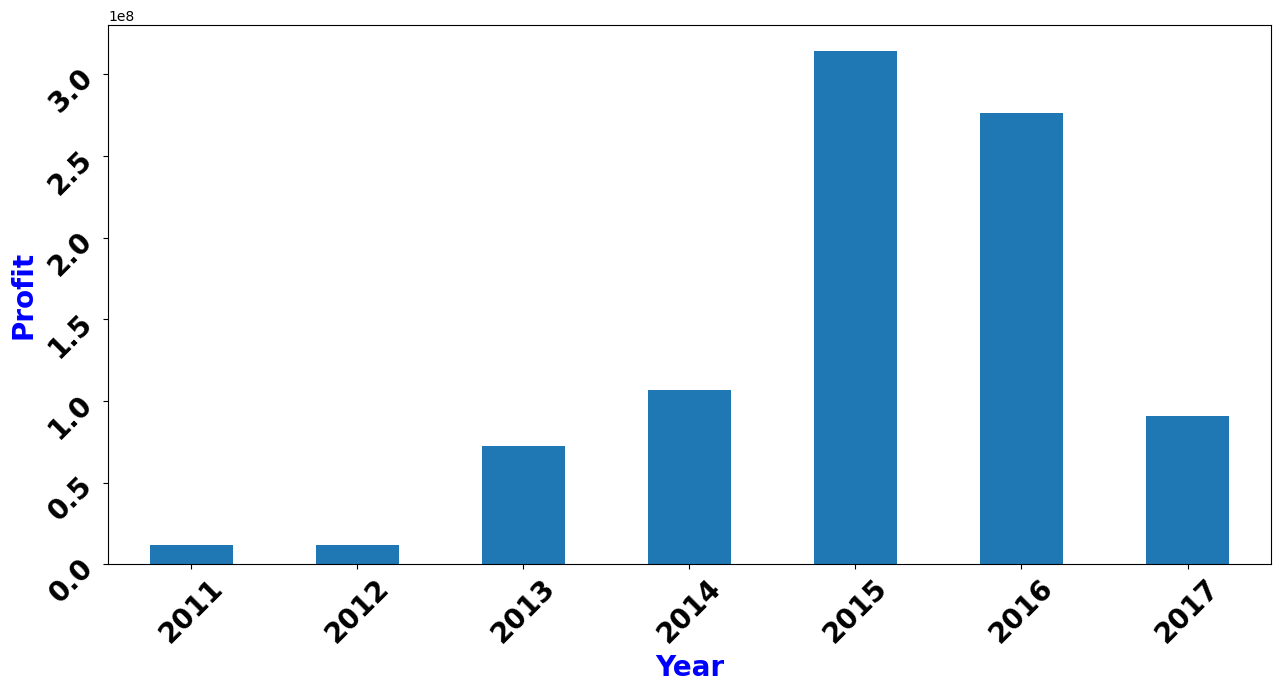

In [99]:
# profit year wise

plt.figure(figsize=(15,7))
df.groupby(['Year'])['profit'].sum().plot(kind = 'bar')
plt.xticks(fontsize = 20,fontweight = 'bold',rotation = 45)
plt.yticks(fontsize = 20,fontweight = 'bold',rotation = 45)
plt.xlabel('Year',fontsize = 20,fontweight = 'bold',
           color = 'blue')
plt.ylabel('Profit',fontsize = 20,fontweight = 'bold',
           color = 'blue')

Text(0, 0.5, 'Profit')

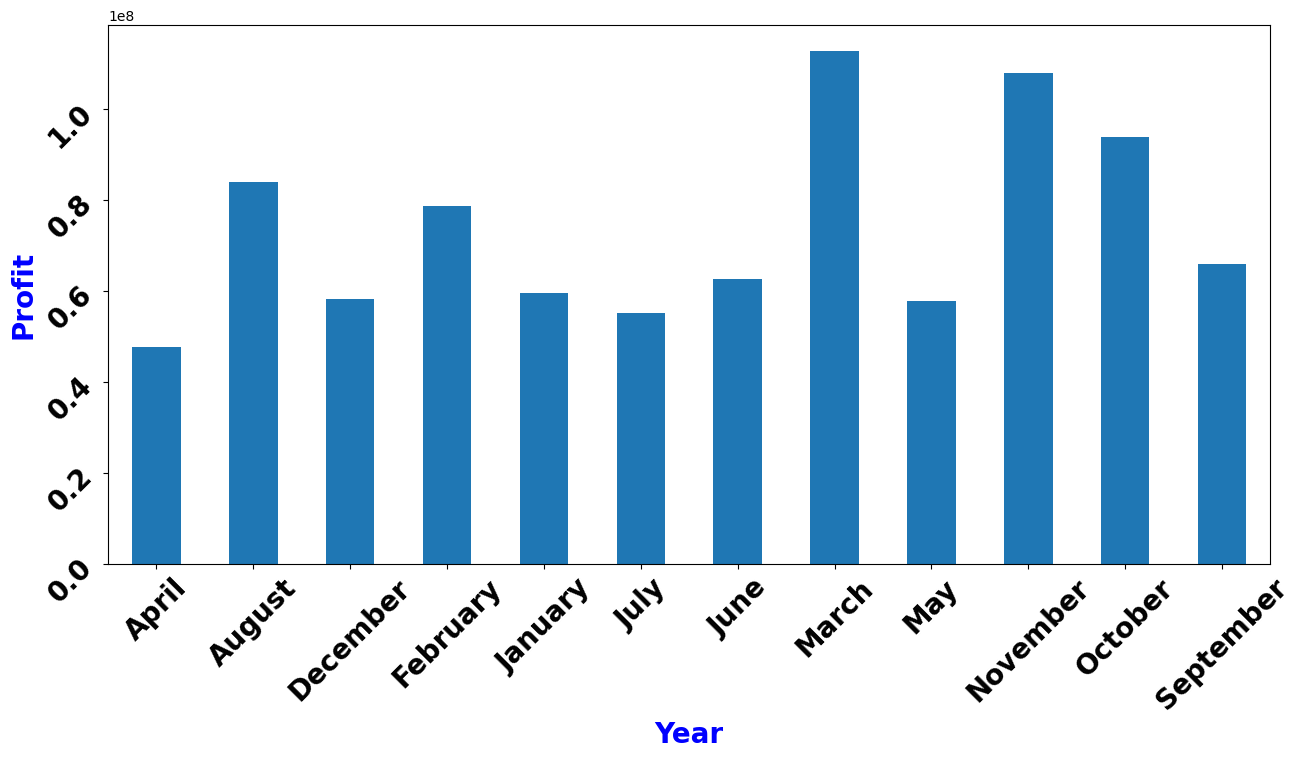

In [100]:
# profit month wise

plt.figure(figsize=(15,7))
df.groupby(['Month_name'])['profit'].sum().plot(kind = 'bar')
plt.xticks(fontsize = 20,fontweight = 'bold',rotation = 45)
plt.yticks(fontsize = 20,fontweight = 'bold',rotation = 45)
plt.xlabel('Year',fontsize = 20,fontweight = 'bold',
           color = 'blue')
plt.ylabel('Profit',fontsize = 20,fontweight = 'bold',
           color = 'blue')

Text(0, 0.5, 'Number of Subscribers')

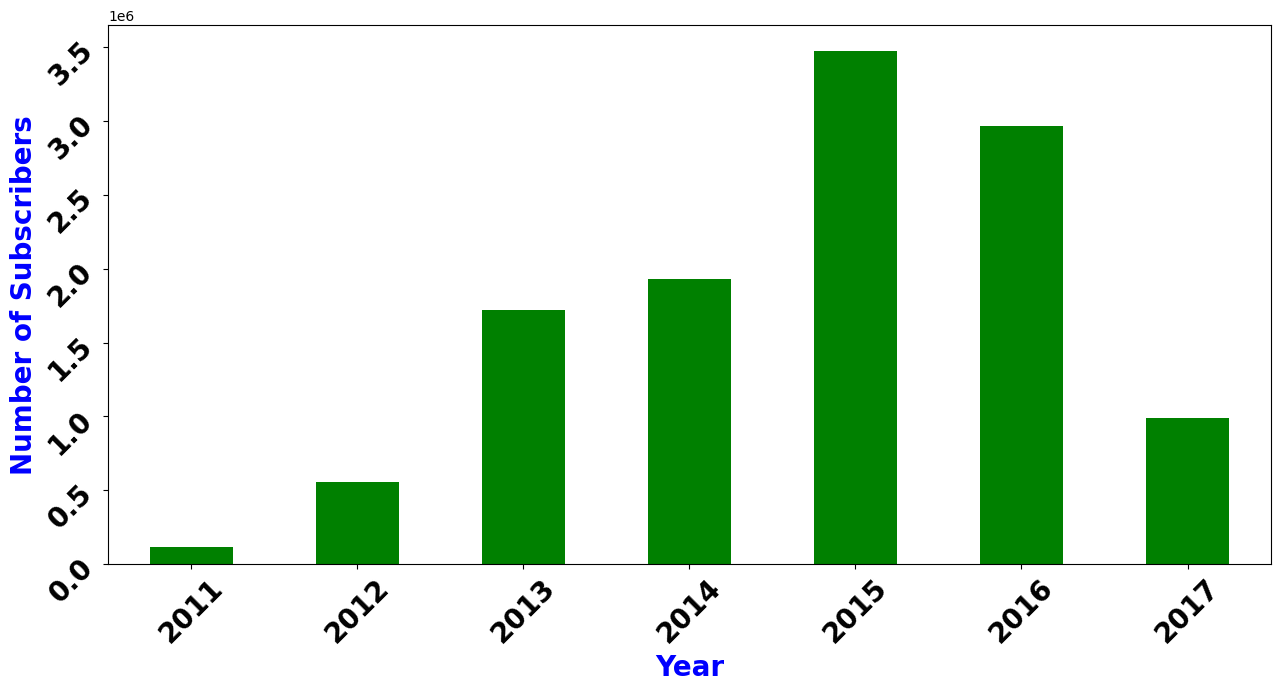

In [101]:
# number of subscribers per year

plt.figure(figsize=(15,7))
df.groupby(['Year'])['num_subscribers'].sum().plot(kind = 'bar',color = 'green')

plt.xticks(fontsize = 20,fontweight = 'bold',rotation = 45)
plt.yticks(fontsize = 20,fontweight = 'bold',rotation = 45)
plt.xlabel('Year',fontsize = 20,fontweight = 'bold',
           color = 'blue')
plt.ylabel('Number of Subscribers',fontsize = 20,fontweight = 'bold',
           color = 'blue')

Text(0, 0.5, 'Number of Subscribers')

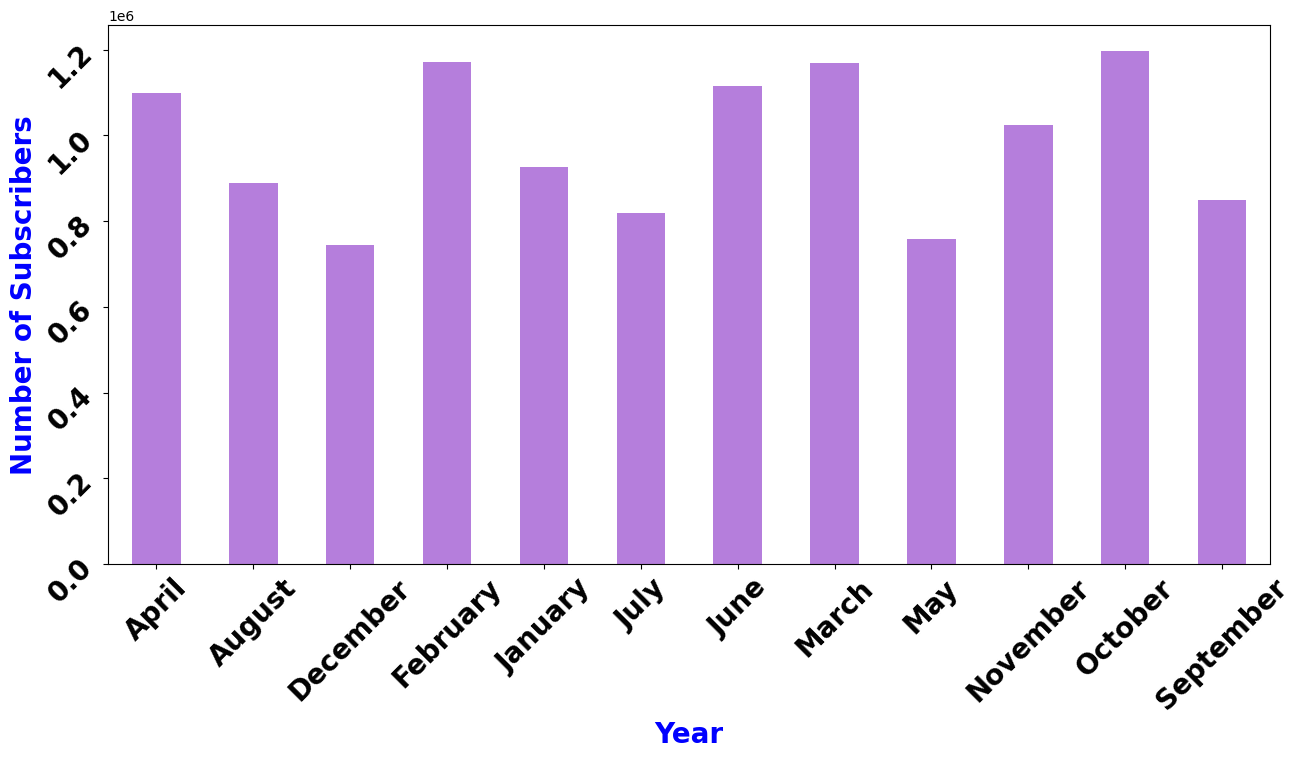

In [102]:
# number of subscribers month wise

plt.figure(figsize=(15,7))
df.groupby(['Month_name'])['num_subscribers'].sum().plot(kind = 'bar',
                                                         color = '#b57edc')

plt.xticks(fontsize = 20,fontweight = 'bold',rotation = 45)
plt.yticks(fontsize = 20,fontweight = 'bold',rotation = 45)
plt.xlabel('Year',fontsize = 20,fontweight = 'bold',
           color = 'blue')
plt.ylabel('Number of Subscribers',fontsize = 20,fontweight = 'bold',
           color = 'blue')

<div class="text_cell_render border-box-sizing rendered_html">
<h4>Questions on Course Title<a class="anchor-link" href="#Questions-on-Course-Title">¶</a>
</h4>
<ul>
<li>Course Title<ul>
<li>What is the most frequent words in course title</li>
<li>Longest/Shortest course title</li>
<li>How can we build recommendation systems via title using similarity</li>
<li>Most famous courses by number of subscribers</li>
</ul>
</li>
</ul>

</div>

In [103]:
df.head(3)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,...,profit,published_date,published_time,year,month,day,Year,Month,Day,Month_name
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,NaN,200.0,2147,23,51,All Levels,1.5 hours,...,429400.0,2017-01-18,20:58:58Z,2017,1,18,2017,1,18,January
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,NaN,75.0,2792,923,274,All Levels,39 hours,...,209400.0,2017-03-09,16:34:20Z,2017,3,9,2017,3,9,March
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,NaN,45.0,2174,74,51,Intermediate Level,2.5 hours,...,97830.0,2016-12-19,19:26:30Z,2016,12,19,2016,12,19,December


In [104]:
# course with maximum length

df[df['course_title'].str.len()==max(df['course_title'].str.len())]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,...,profit,published_date,published_time,year,month,day,Year,Month,Day,Month_name
2191,286898,Aprende a tocar el Acordeón 'de oído y con téc...,https://www.udemy.com/aprende-los-secretos-de-...,NaN,75.0,158,17,59,All Levels,2.5 hours,...,11850.0,2014-07-28,13:55:43Z,2014,7,28,2014,7,28,July


In [105]:
df['course_title'].iloc[2190]

'Aprende a tocar el Acordeón \'de oído y con técnica",https://www.udemy.com/aprende-a-tocar-el-acordeon-de-oido-y-con-tecnica/,true,25,93,21,34,Beginner Level,4 hours,2014-09-16T19:51:45Z\n263432,Aprende los Secretos de la Armónica con HARP&SOUL"'

In [106]:
df.iloc[2190]

course_id                                                         286898
course_title           Aprende a tocar el Acordeón 'de oído y con téc...
url                    https://www.udemy.com/aprende-los-secretos-de-...
is_paid                                                              NaN
price                                                               75.0
num_subscribers                                                      158
num_reviews                                                           17
num_lectures                                                          59
level                                                         All Levels
content_duration                                               2.5 hours
published_timestamp                                 2014-07-28T13:55:43Z
subject                                              Musical Instruments
profit                                                           11850.0
published_date                                     

In [107]:
# most reviewed course

df[df['num_reviews']==max(df['num_reviews'])]



,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,...,profit,published_date,published_time,year,month,day,Year,Month,Day,Month_name
3235,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,NaN,200.0,121584,27445,342,All Levels,43 hours,...,24316800.0,2015-11-02,21:13:27Z,2015,11,2,2015,11,2,November


In [108]:
# course with maximum length

df[df['course_title'].str.len()==min(df['course_title'].str.len())]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,...,profit,published_date,published_time,year,month,day,Year,Month,Day,Month_name
1328,1164570,调色高级讲解,https://www.udemy.com/dezepioy/,NaN,200.0,4,2,8,Beginner Level,1 hour,...,800.0,2017-03-31,17:16:15Z,2017,3,31,2017,3,31,March
1674,1164720,调色中级课程,https://www.udemy.com/ixlnjjvn/,NaN,200.0,5,3,7,Beginner Level,1 hour,...,1000.0,2017-03-31,17:19:38Z,2017,3,31,2017,3,31,March


In [109]:
df['course_title'].iloc[1327]

'超基礎！超入門！〜作りながら学ぶ。完全無料3DCGソフトBlender〜'

In [110]:
df.iloc[1327]

course_id                                              1009622
course_title              超基礎！超入門！〜作りながら学ぶ。完全無料3DCGソフトBlender〜
url                    https://www.udemy.com/blender-beginner/
is_paid                                                    NaN
price                                                     80.0
num_subscribers                                              8
num_reviews                                                  1
num_lectures                                                43
level                                           Beginner Level
content_duration                                     5.5 hours
published_timestamp                       2016-12-14T01:25:19Z
subject                                         Graphic Design
profit                                                   640.0
published_date                             2016-12-14 00:00:00
published_time                                       01:25:19Z
year                                                   

### Keyword Extraction

<ul>
<li>Rake</li>
<li>Yakes</li>
<li>Collection</li>
</ul>

In [111]:
# this library we will use for removing stopwords and tokenization

!pip install neattext

In [112]:
# Text Cleaning to remove stopwords
import neattext.functions as nfx

In [113]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [114]:
# removing all the stopwords

df['Clean_title'] = df['course_title'].apply(nfx.remove_shortwords)
df['Clean_title'].iloc[1:5]

1    Complete Course Certification Grow Your Practice
2    Financial Modeling Business Analysts Consultants
3              Beginner Financial Analysis Excel 2017
4               Maximize Your Profits Trading Options
Name: Clean_title, dtype: object

In [115]:
# head on head comparision

temp = df[['Clean_title','course_title']]

temp.head()

,Clean_title,course_title
0,Ultimate Investment Banking Course,Ultimate Investment Banking Course
1,Complete Course Certification Grow Your Practice,Complete GST Course & Certification - Grow You...
2,Financial Modeling Business Analysts Consultants,Financial Modeling for Business Analysts and C...
3,Beginner Financial Analysis Excel 2017,Beginner to Pro - Financial Analysis in Excel ...
4,Maximize Your Profits Trading Options,How To Maximize Your Profits Trading Options


In [117]:
# finding the maximum length of the clean title

temp[temp['Clean_title'].str.len() == temp['Clean_title'].str.len().max()]


,Clean_title,course_title
293,Multiply your returns using Value Investing ht...,"Multiply your returns using 'Value Investing"",..."


In [118]:
temp['Clean_title'].iloc[293]

'Multiply your returns using Value Investing https udemy multiply your returns using value investing true 1942 Levels hours 2015 23T00 874284 Weekly Forex Analysis Baraq'

In [119]:
temp['course_title'].iloc[293]

'Multiply your returns using \'Value Investing",https://www.udemy.com/multiply-your-returns-using-value-investing/,true,20,1942,19,63,All Levels,4.5 hours,2015-07-23T00:08:33Z\n874284,Weekly Forex Analysis by Baraq FX"'

In [120]:
# we can observe special characters in clean title,we'll remove them

df['Clean_title'] = df['Clean_title'].apply(nfx.remove_special_characters)
df['Clean_title'].iloc[1:5]

1    Complete Course Certification Grow Your Practice
2    Financial Modeling Business Analysts Consultants
3              Beginner Financial Analysis Excel 2017
4               Maximize Your Profits Trading Options
Name: Clean_title, dtype: object

In [121]:
# tokenisation

all_title_list = df['Clean_title'].to_list()

all_title_list[1:5]

['Complete Course Certification Grow Your Practice',
 'Financial Modeling Business Analysts Consultants',
 'Beginner Financial Analysis Excel 2017',
 'Maximize Your Profits Trading Options']

In [122]:
alltokens = [token for line in all_title_list for token in line.split()]

print(len(alltokens))

print(alltokens[1:4])

18227
['Investment', 'Banking', 'Course']


In [123]:
## top50 frequently used words 

from collections import Counter

freq_words = dict(Counter(alltokens).most_common(50))

freq_words

{'Learn': 495,
 'Trading': 281,
 'with': 278,
 'Course': 235,
 'Beginners': 235,
 'Guitar': 211,
 'Design': 189,
 'Complete': 181,
 'Piano': 179,
 'Photoshop': 169,
 'Forex': 165,
 'Build': 164,
 'Financial': 139,
 'Beginner': 138,
 'Create': 136,
 'JavaScript': 124,
 'Your': 119,
 'HTML': 118,
 'Guide': 116,
 'Accounting': 114,
 'Website': 111,
 'from': 111,
 'Development': 110,
 'Options': 101,
 'From': 101,
 'Play': 100,
 'Adobe': 100,
 'With': 99,
 'Introduction': 93,
 'Master': 92,
 'Illustrator': 90,
 'Basics': 89,
 'Scratch': 83,
 'WordPress': 83,
 'Level': 80,
 'Professional': 79,
 'Analysis': 78,
 'Advanced': 77,
 'Easy': 76,
 'Lessons': 73,
 'HTML5': 68,
 'Trade': 66,
 'Stock': 65,
 'Bootstrap': 64,
 'Business': 62,
 'play': 61,
 'Angular': 58,
 'your': 57,
 'Building': 56,
 'Stocks': 55}

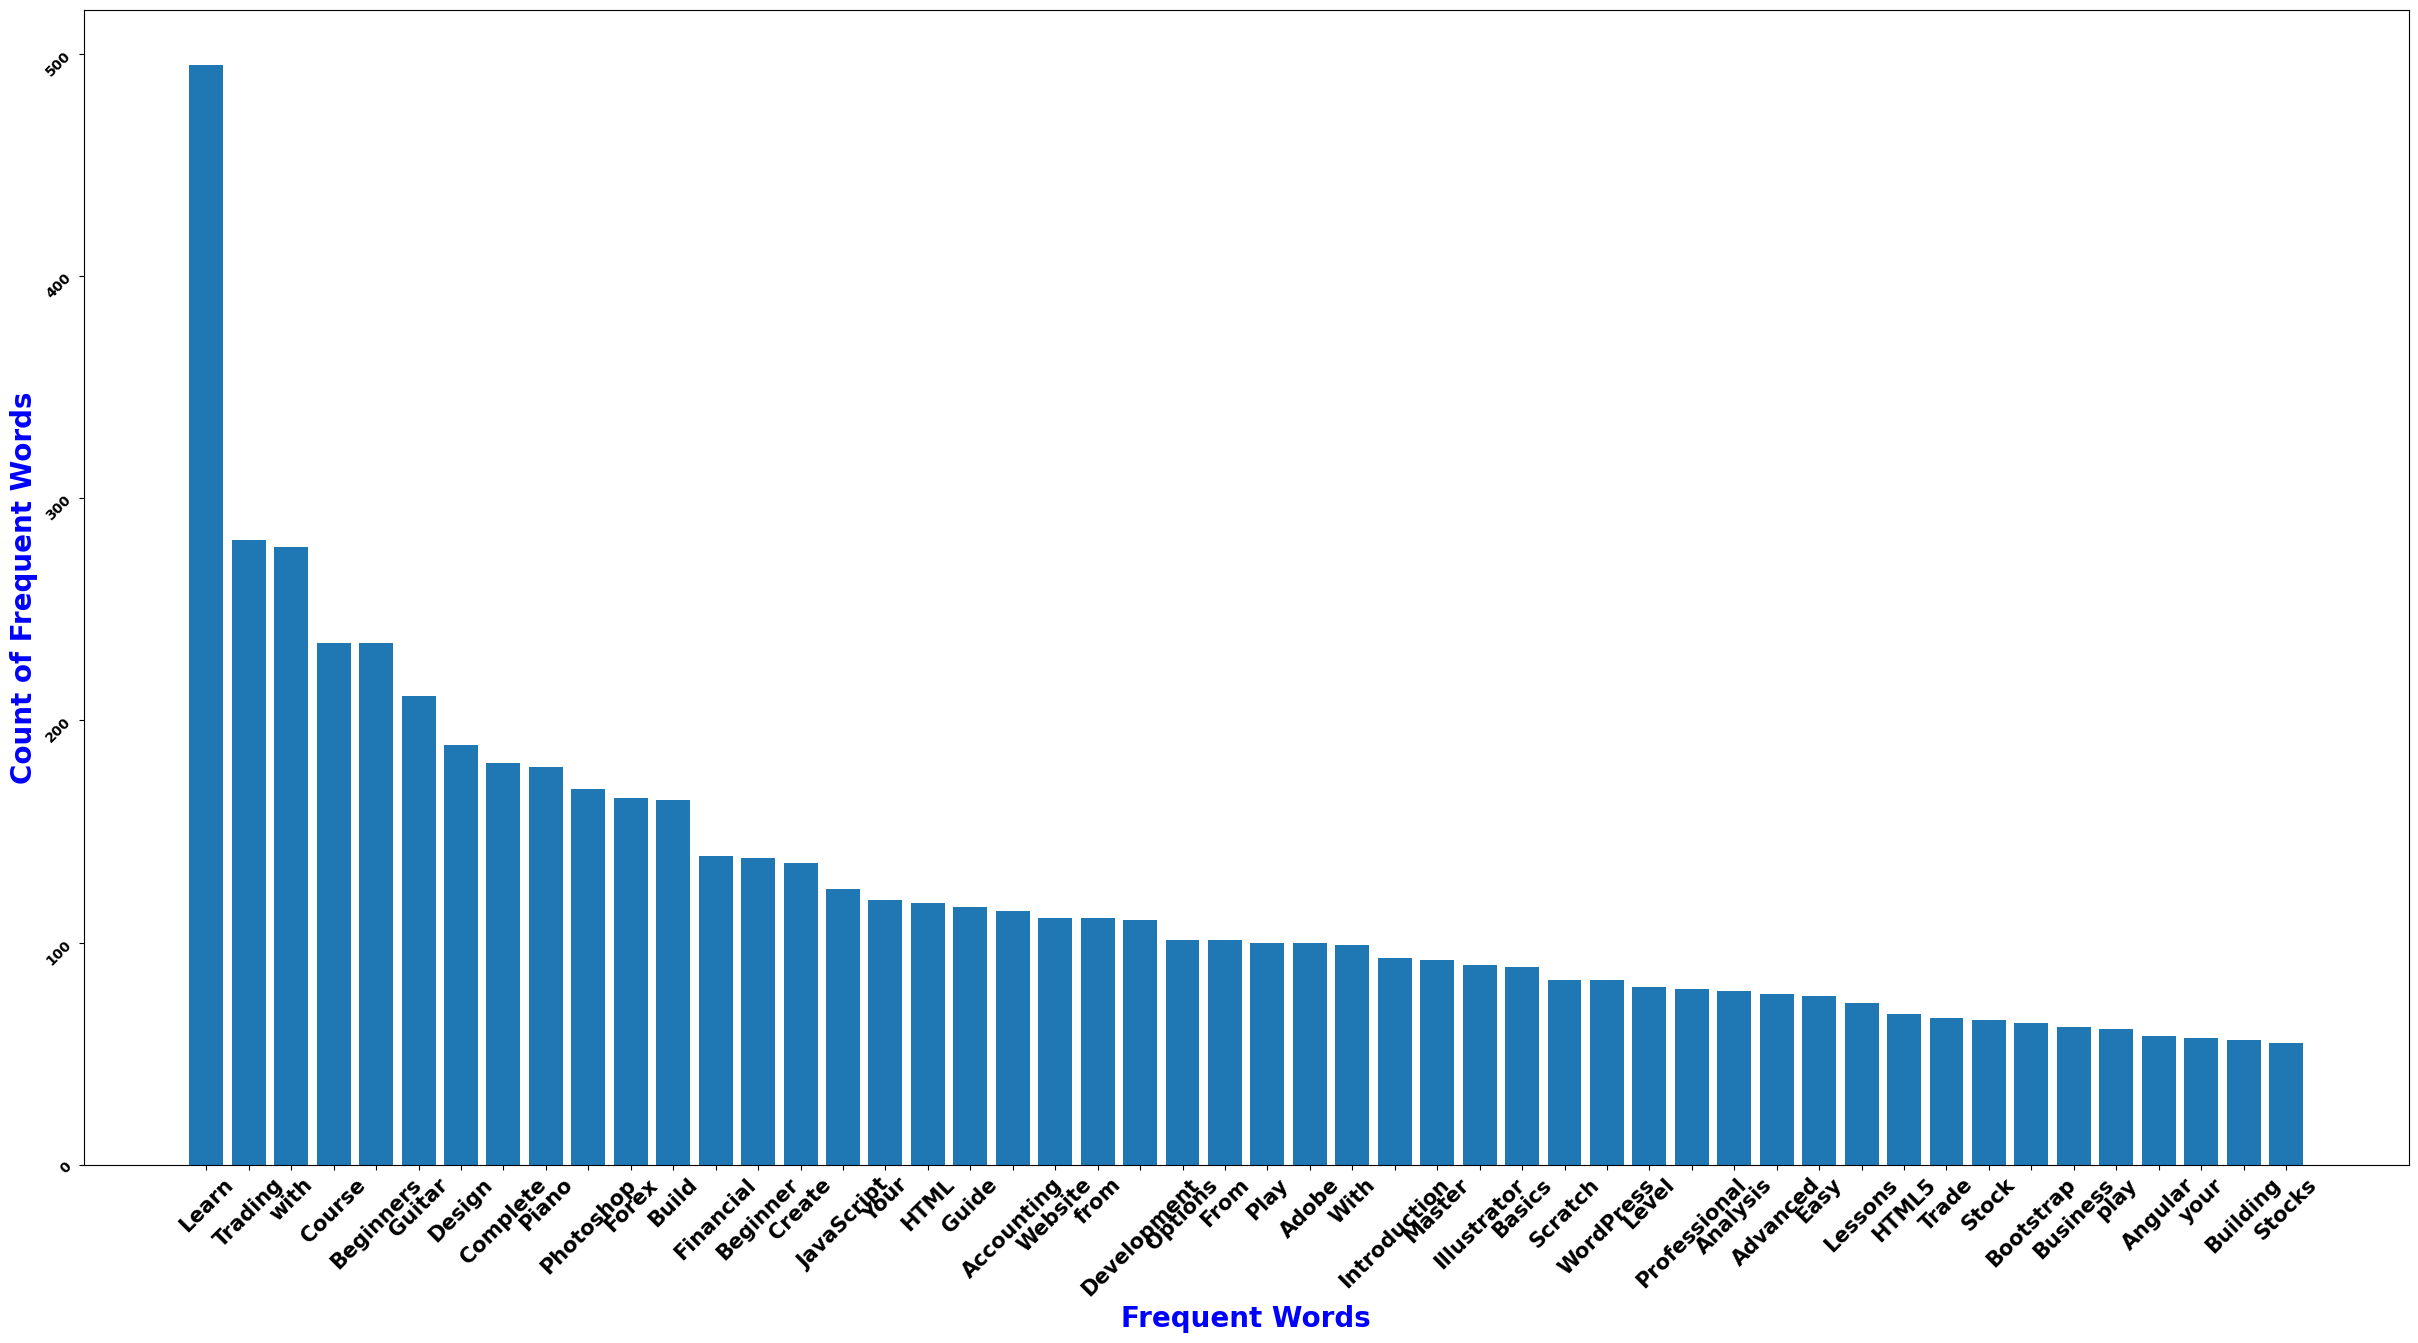

In [124]:
plt.figure(figsize=(30,15))
plt.bar(*zip(*freq_words.items()))
plt.xticks(rotation = 45)

plt.xticks(fontsize = 15,fontweight = 'bold',rotation = 45)
plt.yticks(fontsize = 10,fontweight = 'bold',rotation = 45)
plt.xlabel('Frequent Words',fontsize = 20,fontweight = 'bold',
           color = 'blue')
plt.ylabel('Count of Frequent Words',fontsize = 20,fontweight = 'bold',
           color = 'blue')

plt.show()

In [125]:
!pip install rake_nltk

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------------- -------------------------- 0.5/1.5 MB 3.9 MB/s eta 0:00:01
   ---------------------------------- ----- 1.3/1.5 MB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 3.3 MB/s eta 0:00:00


In [140]:
import nltk

# Specify a custom directory for NLTK data if you don't want to use the default
nltk.data.path.append(r'C:\Users\ashish\nltk_data')

# Download the missing resources
nltk.download('punkt', download_dir=r'C:\Users\ashish\nltk_data')
nltk.download('stopwords', download_dir=r'C:\Users\ashish\nltk_data')


[nltk_data] Downloading package punkt to C:\Users\ashish\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ashish\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [141]:
from rake_nltk import Rake


##### Tokenization

In [142]:
from rake_nltk import Rake
rake = Rake()

allwords = ''.join(alltokens)

rake.extract_keywords_from_text(allwords)

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\ashish/nltk_data'
    - 'D:\\Program Files\\Python313\\nltk_data'
    - 'D:\\Program Files\\Python313\\share\\nltk_data'
    - 'D:\\Program Files\\Python313\\lib\\nltk_data'
    - 'C:\\Users\\ashish\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - 'C:\\Users\\ashish\\nltk_data'
**********************************************************************


In [131]:
rake.get_ranked_phrases_with_scores()

AttributeError: 'Rake' object has no attribute 'rank_list'